In [1]:
!pip install nba_api

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [3]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict 

You create a dictionary, this is just data.

In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.

In [5]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.

In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.

In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

## REST API
<p>Rest API’s function by sending a <b>request</b>,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly if the  Golden State Warriors lost  by two points, the result will be negative two. The API is will handle a lot of the details such a Endpoints and Authentication </p>

In the <code>nba_api</code> to make a request for a specific team, it's quite simple, we don't require a JSON all we require is an id. This information is stored locally in the API. We import the module teams:

In [8]:
from nba_api.stats.static import teams

The method <code>get_teams()</code> returns a list of dictionaries, the dictionary key id has a unique identifier for each team as a value. 

In [9]:
nba_teams = teams.get_teams()
# nba_teams

In [10]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one_dict</code>, to create a dictionary. We use the common keys for each team as the keys,  the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.

In [11]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()
df_teams[df_teams['year_founded'] == df_teams['year_founded'].min()]

,id,full_name,abbreviation,nickname,city,state,year_founded
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
15,1610612752,New York Knicks,NYK,Knicks,New York,New York,1946


We will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:

In [12]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


We can use the following line of code to access the first column of the dataframe:

In [13]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

The function "League Game Finder " will make an API call. It is in the module <code>stats.endpoints</code> 

In [14]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.  
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.

In [15]:
# Since https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [16]:
# we can see the json file by running the following line of code.
# gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative the Warriors lost by that many points, if the value is positive, the warriors one by that amount of points. The column <code>MATCHUP </code>had the team the Warriors were playing, GSW stands for golden state and TOR means Toronto Raptors; <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.

In [17]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900815,2020-02-12,GSW @ PHX,L,240,106,39,77,0.506,11,31.0,0.355,17,19,0.895,4.0,34.0,38.0,27,8,7,22,20,-6.0
1,22019,1610612744,GSW,Golden State Warriors,0021900800,2020-02-10,GSW vs. MIA,L,240,101,30,77,0.390,11,34.0,0.324,30,34,0.882,6.0,34.0,40.0,23,8,2,15,21,-12.0
2,22019,1610612744,GSW,Golden State Warriors,0021900783,2020-02-08,GSW vs. LAL,L,238,120,46,89,0.517,13,32.0,0.406,15,23,0.652,8.0,25.0,33.0,31,15,6,18,27,-5.0
3,22019,1610612744,GSW,Golden State Warriors,0021900757,2020-02-05,GSW @ BKN,L,241,88,35,96,0.365,5,39.0,0.128,13,18,0.722,7.0,27.0,34.0,20,6,7,7,14,-41.0
4,22019,1610612744,GSW,Golden State Warriors,0021900744,2020-02-03,GSW @ WAS,W,241,125,43,87,0.494,15,30.0,0.500,24,31,0.774,12.0,32.0,44.0,31,8,6,14,25,8.0


You can download the dataframe from the API call for Golden State and run the rest like a video.

In [18]:
# ! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

In [19]:
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl'
filename = 'Golden_State.pkl'
urllib.request.urlretrieve(url, filename)

('Golden_State.pkl', <http.client.HTTPMessage at 0xc163788>)

In [20]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head(3)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,32,82,0.390,7,31.0,0.226,16,20,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,29,66,0.439,2,15.0,0.133,13,15,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,32,74,0.432,6,28.0,0.214,18,29,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0


We can create two dataframes, one  for the games that the Warriors faced the raptors at home and the second for away games.

In [21]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

In [22]:
games_home.mean()['PLUS_MINUS']

3.730769230769231

In [23]:
games_home.mean()['PLUS_MINUS']

3.730769230769231

In [24]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

We can plot out the <code>PLUS MINUS</code> column for  for the dataframes  <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.

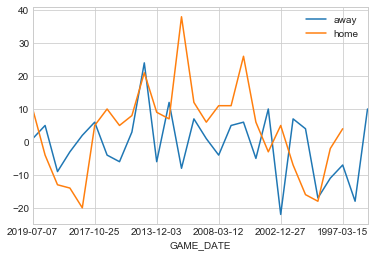

In [25]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()